Total Nulls: Country or region              0
Happiness Rank               302
Score                          0
Economy: GDP per capita        0
Social support                 0
Healthy life expectancy        0
Freedom                        0
Perceptions of corruption      1
Generosity                   153
Year                           0
dtype: int64
 Total Duplicates: 0
Generosity Median is 0.2019822115
Perceptions of Corruption Median is 0.091


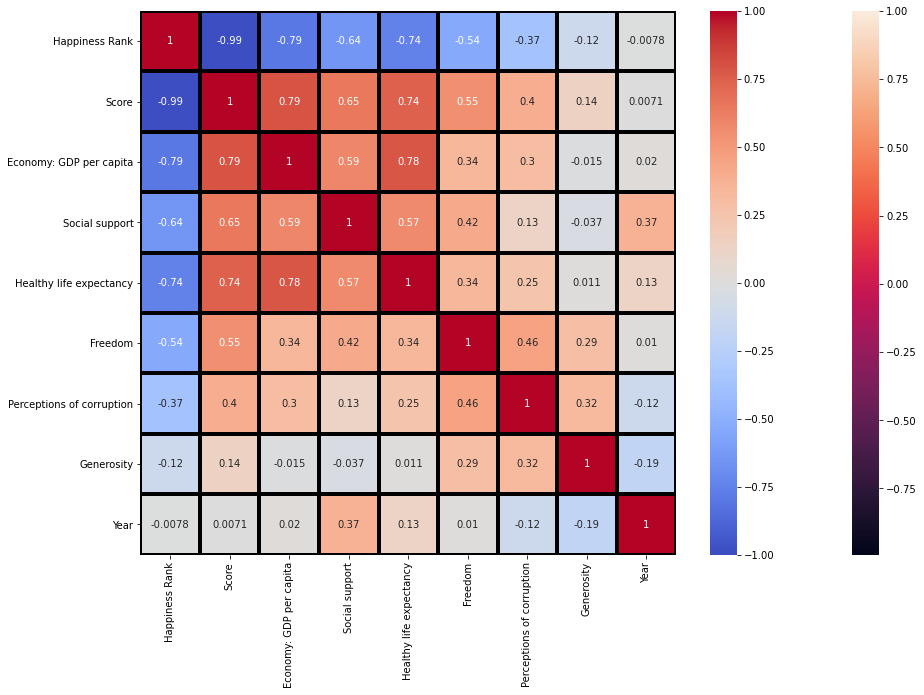

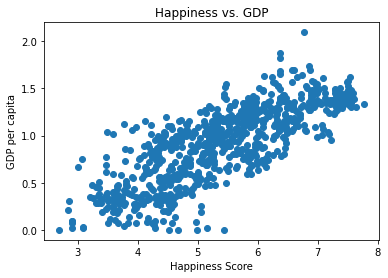

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as MSE

df = pd.read_csv("world_happiness_15_21.csv")

total_null = df.isnull().sum() #find total null values in each column
total_duplicates = df.duplicated().sum() #find duplicate values

print(f"Total Nulls: {total_null}\n Total Duplicates: {total_duplicates}")

#Keeping rows with only Happiness ranks
df = df[df['Happiness Rank'].notna()]

#Replace Null Values in Perceptions of Corruption and Generosity Columns Using Imputation 
generosity_median = df['Generosity'].median()
print("Generosity Median is {}".format(generosity_median))
perceptions_of_corruption_median = df['Perceptions of corruption'].median()
print("Perceptions of Corruption Median is {}".format(perceptions_of_corruption_median))

df['Generosity'].fillna(generosity_median, inplace = True)
df['Perceptions of corruption'].fillna(perceptions_of_corruption_median, inplace = True)



#Heat map to show correlation matrix 
# let's see the correlation between the features using heatmap


plt.figure(figsize=(15, 10))                 # This specifies the size, the bigger the map, the easier we can understand the map

sns.heatmap(df.corr())                # This is sufficient but adding the 'annot' argument makes interpretaton easier

sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')  # 'annot' helps display the correlation coefficient

plt.savefig("correlation_matrix.png")
plt.show()


#Create Scatter Plot for Happiness vs. GDP

happiness = df['Score']
gdp = df["Economy: GDP per capita"]


plt.scatter(happiness, gdp)
plt.title('Happiness vs. GDP')
plt.xlabel("Happiness Score")
plt.ylabel("GDP per capita")
plt.savefig("happiness_gdp_scatter.png")
plt.show()





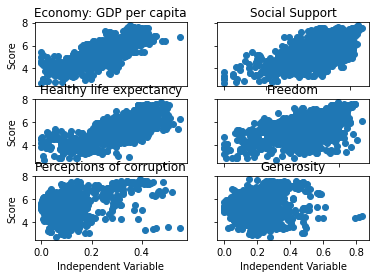

In [10]:
#Create Scatter Plot of all features vs. Score 

fig, axs = plt.subplots(3, 2)
axs[0,0].scatter(df["Economy: GDP per capita"], df["Score"])
axs[0, 0].set_title('Economy: GDP per capita')
axs[0,1].scatter( df["Social support"], df["Score"])
axs[0, 1].set_title('Social Support')
axs[1,0].scatter( df["Healthy life expectancy"],df["Score"])
axs[1, 0].set_title('Healthy life expectancy')
axs[1,1].scatter(df["Freedom"], df["Score"])
axs[1, 1].set_title('Freedom')
axs[2,0].scatter( df["Perceptions of corruption"], df["Score"])
axs[2, 0].set_title('Perceptions of corruption')
axs[2,1].scatter(df["Generosity"], df["Score"])
axs[2, 1].set_title('Generosity')

for ax in axs.flat:
    ax.set(xlabel='Independent Variable', ylabel='Score')

for ax in axs.flat:
    ax.label_outer()
plt.savefig("feature_vs_score.png")









In [ ]:
# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)

#Getting just 2019

df = df[df["Year"] == 2019]

#Get rid of categorical values
new_df = df[["Economy: GDP per capita", "Social support", "Healthy life expectancy", "Freedom", "Perceptions of corruption", "Score"]]
print(new_df)


# gdp_freedom =new_df[["Economy: GDP per capita", "Freedom"]]
# gdp_freedom.plot(x="Economy: GDP per capita", y="Freedom", kind='scatter')
# plt.title("GDP vs. Freedom")
# plt.savefig("GDP_freedom.png")
# plt.show()

#Adjust X to include the variables you want to use to compute the model 
X = new_df[["Economy: GDP per capita",  "Social support"]]
y = new_df["Score"]




#Need to normalize/scale all the variables because the GDP
scale = StandardScaler()

minmaxscaler = MinMaxScaler()

#Adjust these variables to include the ones you want for the regression model 
num_vars = ["Economy: GDP per capita",  "Social support"]

X[num_vars] = minmaxscaler.fit_transform(X[num_vars])



#Divide into X and Y sets 
'''
y_train = df_train.pop('Score')
X_train = df_train 

y_test = df_test.pop("Score")
X_test = df_test
'''

# X = features, y = target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


print("THIS IS IS X_TRAIN" , X_train)


#Build Linear Model
lm = LinearRegression()                   # instantiating the model

lm.fit(X_train, y_train)                      # fitting the model with the training dataset

#make dataframe of the coefficients to help us easily determine which variable carries the most weight 

coefficient = lm.coef_

coefficient_df = pd.DataFrame(list(zip(X_train.columns, lm.coef_)), columns=['features', 'coefficients'])
coefficient_df.to_csv("2019GDP_social_coefficientdf.csv")

#Get r_squared value 
print("This is the R squared value", lm.score(X, y))


#Get summary statistics 
#add constant to predictor variables
x = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

# making predictions on the test data

y_pred = lm.predict(X_test)

# comparing actual values with predicted values
actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_pred = actual_vs_pred.sort_values(by='Predicted', ascending=False)

print('Root Mean Squared Error:', np.sqrt(MSE(y_test, y_pred)))
